In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('pokemon/pokemon.csv')

In [3]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

## CHECKING FOR NULL VALUES

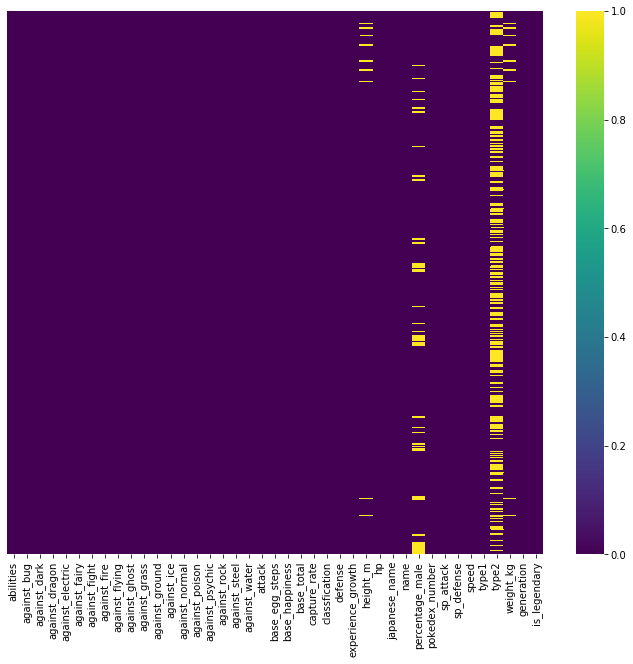

In [5]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [6]:
df.nunique()

abilities            482
against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
capture_rate          34
classfication        588
defense              109
experience_growth      6
height_m              51
hp                    99
japanese_name        801
name                 801
percentage_male        7
pokedex_number       801
sp_attack            111
sp_defense            97
speed                113
type1                 18
type2                 18
weight_kg            421
generation             7


FILLING IN THE NULL VALUES WITH MEAN OF THE COLUMN

In [7]:
def set_mean_sex(pm):
    
    if pd.isnull(pm):
        return df['percentage_male'].mean()
    else:
        
        return pm
        

In [8]:
df['percentage_male']=df['percentage_male'].apply(set_mean_sex)

In [9]:
def set_mean_height(pm):
    
    if pd.isnull(pm):
        return df['height_m'].mean()
    else:
        
        return pm

In [10]:
df['height_m']=df['height_m'].apply(set_mean_height)

In [11]:
def set_mean_weight(pm):
    
    if pd.isnull(pm):
        return df['weight_kg'].mean()
    else:
        
        return pm

In [12]:
df['weight_kg']=df['weight_kg'].apply(set_mean_weight)

DROPPING THE "type2" column as it had many Null Values

In [13]:
df.drop('type2',axis=1,inplace=True)

## OUR DATA IS NOW CLEAN

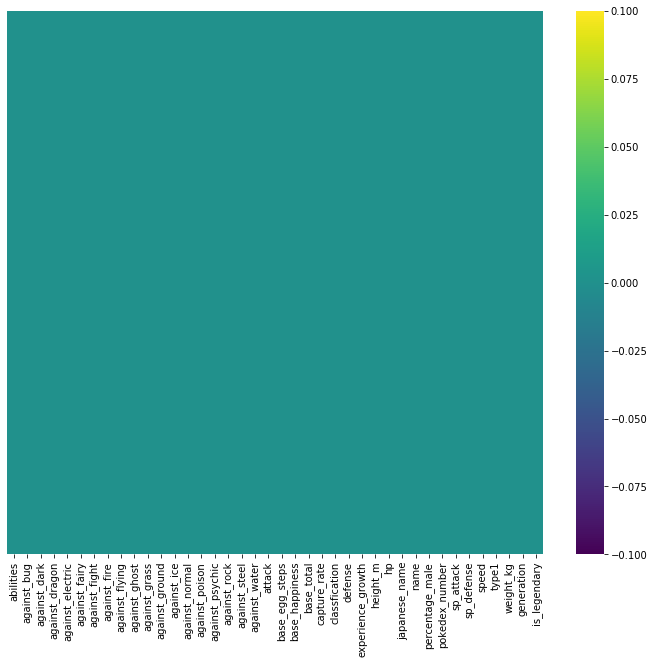

In [14]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

# EXPOLATORY  DATA   ANALYSIS

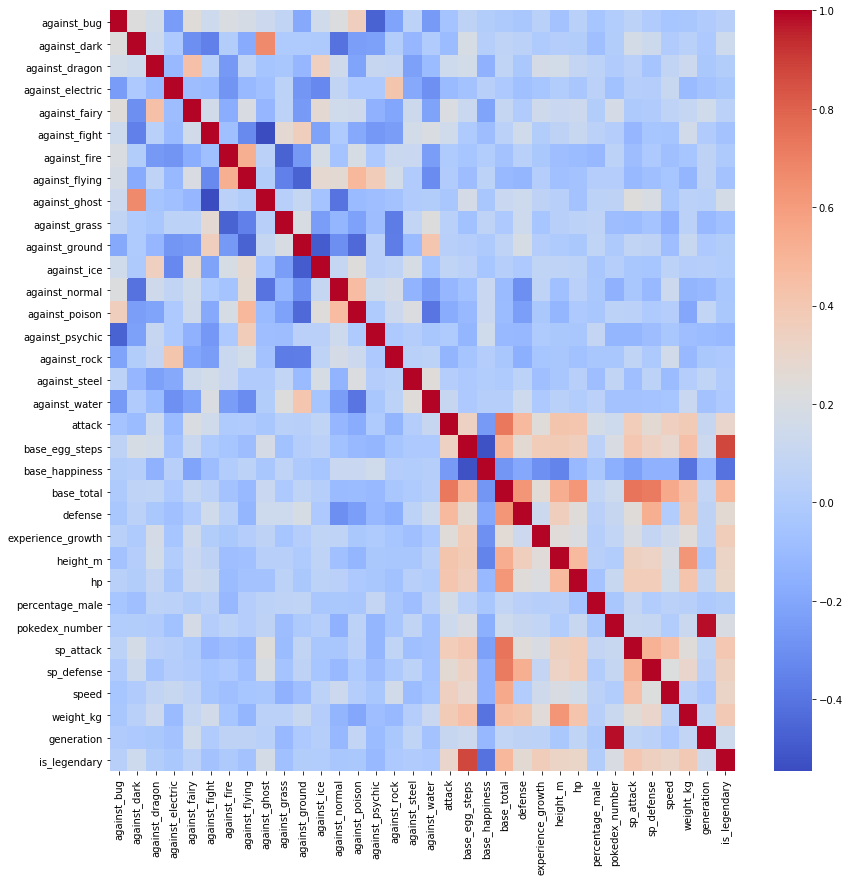

In [15]:
fig=plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)


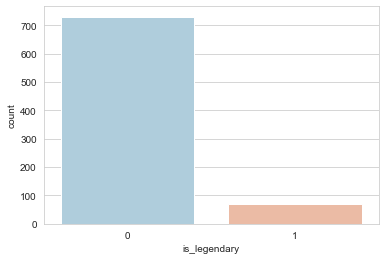

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='is_legendary',data=df,palette='RdBu_r')

# HOW DOES MASCULANITY AFFECTS THE POKEMON'S CHANCE OF BEING LEGENDARY

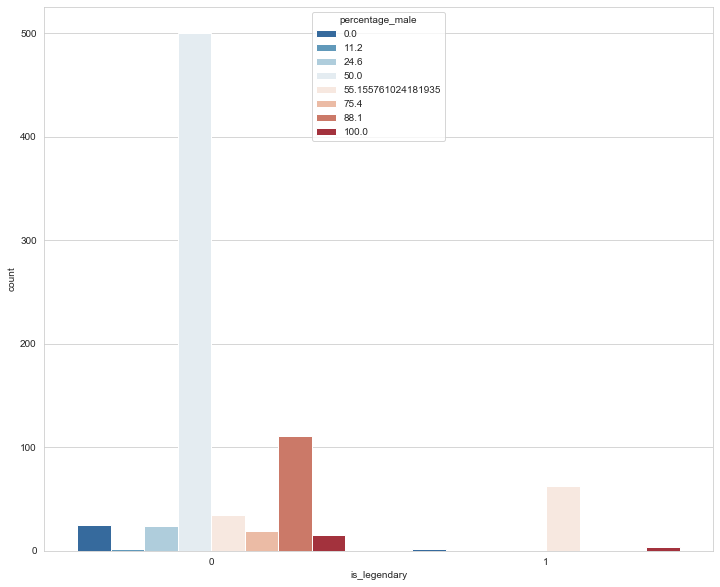

In [17]:
#HOW DOES MASCULANITY EFFECT THE POKEMON'S CHANCE OF BEING LEGENDARY
sns.set_style('whitegrid')
fig=plt.figure(figsize=(12,10))
sns.countplot(x='is_legendary',data=df,hue='percentage_male',palette='RdBu_r')

# WHICH TYPE OF POKEMON HAS THE MOST CHANCES TO BECOME LEGENDARY

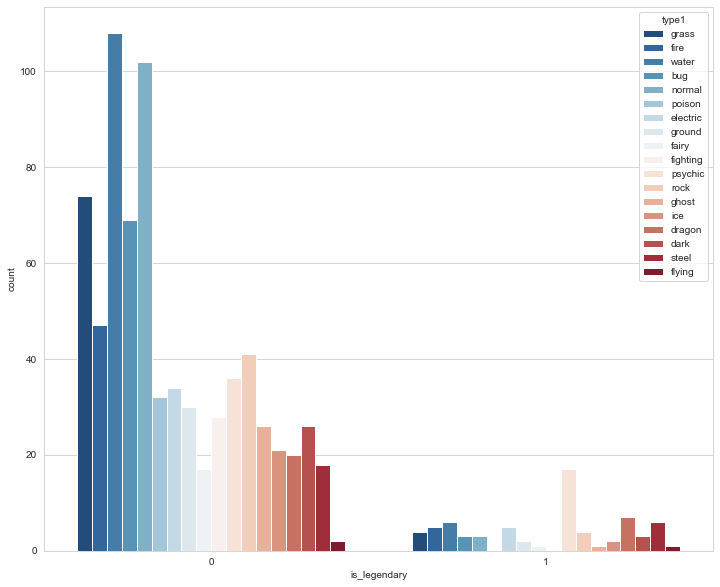

In [18]:

sns.set_style('whitegrid')
fig=plt.figure(figsize=(12,10))
sns.countplot(x='is_legendary',data=df,hue='type1',palette='RdBu_r')

CORRELATION BETWEEN HEIGHT, WEIGHT AND BASE HAPPINESS OF THE POKEMONS

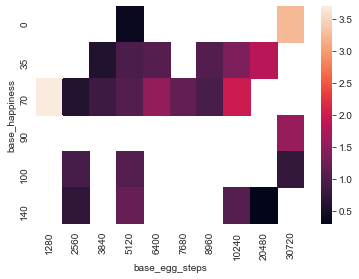

In [20]:
corr = df.pivot_table(values='height_m',index='base_happiness',columns='base_egg_steps')
sns.heatmap(corr)

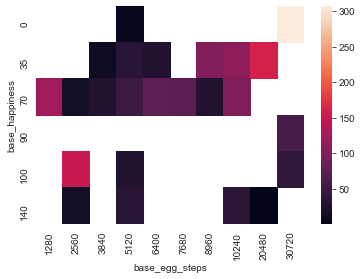

In [21]:
corr = df.pivot_table(values='weight_kg',index='base_happiness',columns='base_egg_steps')
sns.heatmap(corr)

RELATION BETWEEN EGG STEPS AND EXPERIENCE GROWTH

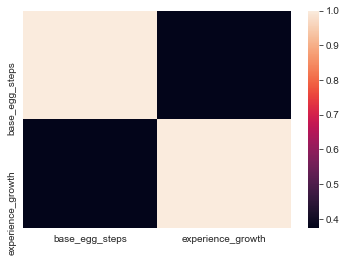

In [22]:

data=df[['base_egg_steps','experience_growth']]
correlation=data.corr()
sns.heatmap(correlation)

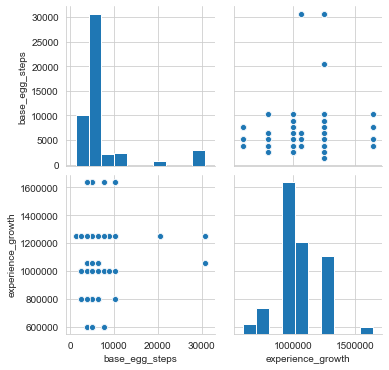

In [23]:
rel=['base_egg_steps','experience_growth']
sns.pairplot(df,vars=rel)

# DATA  PREPROCESSING

 ADDING DUMMY VARIABLES AND DROPPING SOME COLUMNS

In [32]:
#ADDING DUMMY VARIABLES SO THAT WE CAN PERFORM LOGISTIC REGRESSION
type1 = pd.get_dummies(df['type1'],drop_first=True)


In [33]:
df.drop(['abilities','capture_rate','classfication','japanese_name','name','type1'],axis=1,inplace=True)

In [34]:
df = pd.concat([df,type1],axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

# THE LEGENDARY POKEMON CLASSIFIER##

TRAIN TEST SPLIT

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_legendary',axis=1), 
                                                    df['is_legendary'], test_size=0.30, 
                                                    random_state=101)

TRAINING AND PREDICTING

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Shivam Shandilya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = logmodel.predict(X_test)

# EVALUATION

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       224
           1       0.94      0.88      0.91        17

    accuracy                           0.99       241
   macro avg       0.96      0.94      0.95       241
weighted avg       0.99      0.99      0.99       241



In [48]:
print(confusion_matrix(y_test,predictions))

[[223   1]
 [  2  15]]


# This is our LEGENDARY CLASSIFIER, with an accuracy of 99 percent.

Below we show our Pokemon Dream Team.

# POKEMON DREAM TEAM

DESCRIPTION:-A team of 6 Pokemons that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemons.

In [102]:
df=pd.read_csv('pokemon/pokemon.csv')

In [103]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [151]:
tmp=df[['attack','defense','sp_attack','sp_defense']]

In [152]:
tmp

,attack,defense,sp_attack,sp_defense
0,49,49,65,65
1,62,63,80,80
2,100,123,122,120
3,52,43,60,50
4,64,58,80,65
...,...,...,...,...
796,101,103,107,101
797,181,131,59,31
798,101,53,97,53
799,107,101,127,89


In [153]:
total=tmp['attack']+tmp['defense']+tmp['sp_attack']+tmp['sp_defense']

In [154]:
d={'Total':total}

In [155]:
Total=pd.DataFrame(d)

In [156]:
Total

,Total
0,228
1,285
2,465
3,205
4,267
...,...
796,412
797,402
798,304
799,424


In [157]:
tmp=pd.concat([tmp,Total],axis=1)

In [158]:
tmp

,attack,defense,sp_attack,sp_defense,Total
0,49,49,65,65,228
1,62,63,80,80,285
2,100,123,122,120,465
3,52,43,60,50,205
4,64,58,80,65,267
...,...,...,...,...,...
796,101,103,107,101,412
797,181,131,59,31,402
798,101,53,97,53,304
799,107,101,127,89,424


In [159]:
df=pd.concat([df,Total],axis=1)

In [163]:
fin=df.nlargest(6, ['Total'])

In [166]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 381 to 149
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          6 non-null      object 
 1   against_bug        6 non-null      float64
 2   against_dark       6 non-null      float64
 3   against_dragon     6 non-null      float64
 4   against_electric   6 non-null      float64
 5   against_fairy      6 non-null      float64
 6   against_fight      6 non-null      float64
 7   against_fire       6 non-null      float64
 8   against_flying     6 non-null      float64
 9   against_ghost      6 non-null      float64
 10  against_grass      6 non-null      float64
 11  against_ground     6 non-null      float64
 12  against_ice        6 non-null      float64
 13  against_normal     6 non-null      float64
 14  against_poison     6 non-null      float64
 15  against_psychic    6 non-null      float64
 16  against_rock       6 non-n

In [184]:
dream_team=fin[['name','japanese_name','pokedex_number','type1','attack','defense','sp_attack','sp_defense','Total']]

In [185]:
dream_team.set_index('type1')

,name,japanese_name,pokedex_number,attack,defense,sp_attack,sp_defense,Total
type1,,,,,,,,
water,Kyogre,Kyogreカイオーガ,382,150,90,180,160,580
ground,Groudon,Groudonグラードン,383,180,160,150,90,580
dragon,Rayquaza,Rayquazaレックウザ,384,180,100,180,100,560
water,Wishiwashi,Yowashi (tandoku No Sugata)ヨワシ,746,140,130,140,135,545
rock,Diancie,Diancieディアンシー,719,160,110,160,110,540
psychic,Mewtwo,Mewtwoミュウツー,150,150,70,194,120,534


THIS IS OUR POKEMON DREAM TEAM.

# WORK DONE BY TEAM:- V FOR VENDETTA.